TASK 1

In [54]:
import pandas as pd

def load_data(file_path):
    return pd.read_csv(file_path)



In [55]:
def clean_data(df):
    # Check if 'PetID' exists before dropping it
    if 'PetID' in df.columns:
        df = df.drop('PetID', axis=1)  # Drop 'PetID' column

    # Check for missing values
    if df.isnull().values.any():
        df = df.dropna()  # Drop rows with missing values

    # Convert Birthdate column to datetime
    df['Birthdate'] = pd.to_datetime(df['Birthdate'])

    # Ensure Price column is numeric
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

    return df




TASK 2

In [56]:
def calculate_average_price(df, species):
    species_data = df[df['Species'] == species]
    average_price = species_data['Price'].mean()
    return average_price



In [57]:
def find_pets_with_feature(df, feature):
    feature_pets = df[df['SpecialFeature'] == feature]
    pet_names = feature_pets['Name'].tolist()
    return pet_names



TASK 3

In [58]:
def get_species_statistics(df):
    species_stats = {}

    # Group by species
    grouped_species = df.groupby('Species')

    # Calculate average price and age for each species
    for species, group in grouped_species:
        avg_price = group['Price'].mean()
        avg_age = group['Age'].mean()
        species_stats[species] = {'Average Price': avg_price, 'Average Age': avg_age}

    return species_stats



In [59]:
import json
from pet_analysis import load_data, clean_data, get_species_statistics

# Load data
file_path = 'pets.csv'
pets_df = load_data(file_path)

# Clean data
cleaned_df = clean_data(pets_df)

# Get species statistics
species_stats = get_species_statistics(cleaned_df)

# Print the formatted output
formatted_output = json.dumps(species_stats, indent=4)
print(formatted_output)



{
    "Bird": {
        "Average Price": 68.92999999999999,
        "Average Age": 2.2857142857142856
    },
    "Reptile": {
        "Average Price": 77.59555555555556,
        "Average Age": 4.222222222222222
    },
    "Small Animal": {
        "Average Price": 95.64285714285715,
        "Average Age": 2.857142857142857
    },
    "Dog": {
        "Average Price": 86.615,
        "Average Age": 3.1666666666666665
    },
    "Cat": {
        "Average Price": 90.14181818181818,
        "Average Age": 2.4545454545454546
    },
    "Rabbit": {
        "Average Price": 90.60615384615383,
        "Average Age": 3.076923076923077
    }
}


TASK 4

In [60]:
import matplotlib.pyplot as plt

def plot_price_distribution(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title('Price Distribution')
    plt.grid(True)
    plt.savefig('price_distribution.png')
    plt.show()


In [61]:
def plot_average_price_by_species(df):
    avg_price_by_species = df.groupby('Species')['Price'].mean().sort_values()
    plt.figure(figsize=(10, 6))
    avg_price_by_species.plot(kind='bar', color='green')
    plt.xlabel('Species')
    plt.ylabel('Average Price')
    plt.title('Average Price by Species')
    plt.grid(axis='y')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('average_price_by_species.png')
    plt.show()


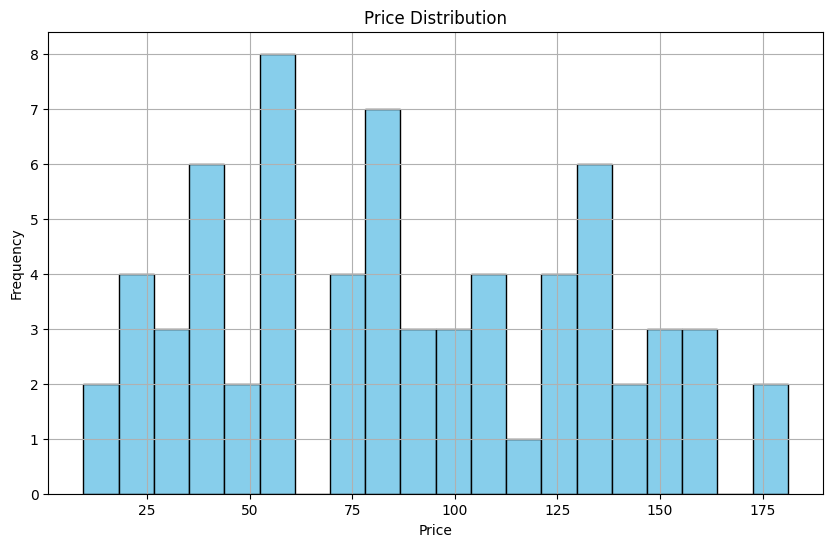

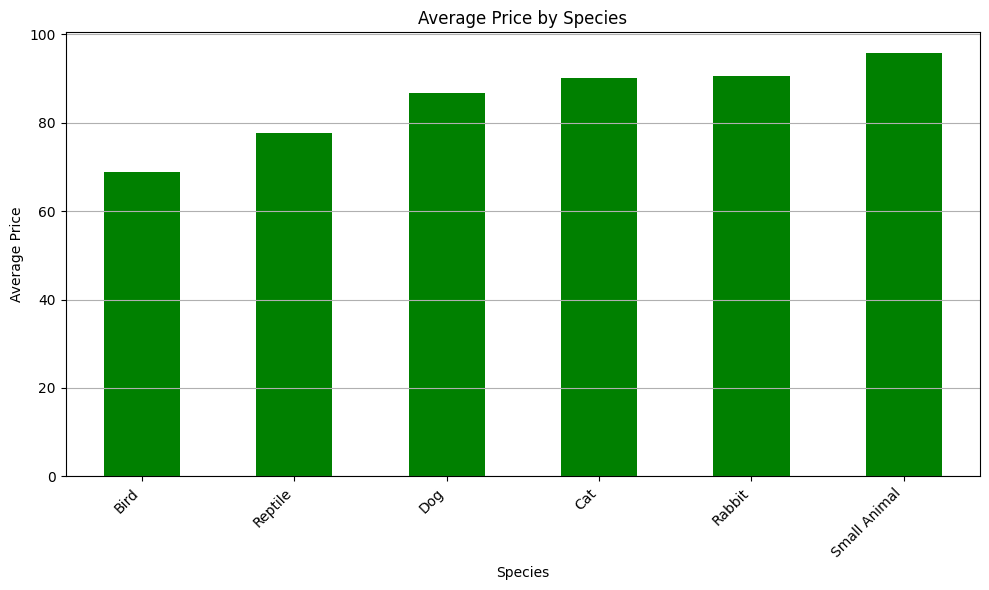

In [62]:

# Call function to plot price distribution
plot_price_distribution(pets_df)

# Call function to plot average price by species
plot_average_price_by_species(pets_df)


TASK 5

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_price_vs_age(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Age', y='Price')
    plt.title('Price vs Age')
    plt.xlabel('Age')
    plt.ylabel('Price')
    plt.savefig('price_vs_age.png')
    plt.show()



In [110]:
!pip install -U kaleido

In [115]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt

# Load data
file_path = 'path/to/pets.csv'
pets_df = pd.read_csv(file_path)

# Clean data
def clean_data(df):
    # Add code for data cleaning here
    return df

# Plot price distribution using Seaborn
def plot_price_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Price'], bins=20, kde=True)
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.savefig('price_distribution.png')
    plt.show()

# Plot average price by species using Plotly
def plot_average_price_by_species(df):
    avg_price_by_species = df.groupby('Species')['Price'].mean().reset_index()
    fig = px.bar(avg_price_by_species, x='Species', y='Price', title='Average Price by Species')
    fig.update_layout(xaxis_title='Species', yaxis_title='Average Price')
    fig.write_image('average_price_by_species.png')
    fig.show()

# Function to plot price vs age using Seaborn
def plot_price_vs_age(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Age', y='Price')
    plt.title('Price vs Age')
    plt.xlabel('Age')
    plt.ylabel('Price')
    plt.savefig('price_vs_age.png')
    plt.show()

# Function to plot age distribution by species using Plotly
def plot_age_distribution_by_species(df):
    fig = px.box(df, x='Species', y='Age', title='Age Distribution by Species')
    fig.update_layout(xaxis_title='Species', yaxis_title='Age')
    fig.write_image('age_distribution_by_species.png')
    fig.show()

# Set the orca executable path
pio.orca.config.executable = '/path/to/your/orca/executable'

# Call the functions
cleaned_df = clean_data(pets_df)
plot_price_distribution(cleaned_df)
plot_average_price_by_species(cleaned_df)
plot_price_vs_age(cleaned_df)
plot_age_distribution_by_species(cleaned_df)



FileNotFoundError: [Errno 2] No such file or directory: 'path/to/pets.csv'